In [1]:
import torch
import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import random
torch.manual_seed(9)

## Loading dataset

In [2]:
mnist_train = dsets.MNIST(root='data/',
                         train=True,
                         transform = transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

batch_size = 100

data_loader =  torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

## Deep Neural Network Model

In [6]:
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 256, bias=True)
linear6 = torch.nn.Linear(256, 128, bias=True)
linear7 = torch.nn.Linear(128, 10, bias=True)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu,
                           linear2, relu,
                           linear3, relu,
                           linear4, relu,
                           linear5, relu,
                           linear6, relu,
                           linear7, relu)

print(model)

Sequential (
  (0): Linear (784 -> 512)
  (1): ReLU ()
  (2): Linear (512 -> 512)
  (3): ReLU ()
  (4): Linear (512 -> 512)
  (5): ReLU ()
  (6): Linear (512 -> 512)
  (7): ReLU ()
  (8): Linear (512 -> 256)
  (9): ReLU ()
  (10): Linear (256 -> 128)
  (11): ReLU ()
  (12): Linear (128 -> 10)
  (13): ReLU ()
)


In [7]:
cost_func = torch.nn.CrossEntropyLoss()

learning_rate = 0.001
training_epochs = 30

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()
        Y_prediction = model(X)
        cost = cost_func(Y_prediction, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("[Epoch: {:>4}] cost  = {:>.9}".format(epoch+1, avg_cost.data[0]))
    
print('Learning Finished~!#@')

[Epoch:    1] cost  = 0.590553045
[Epoch:    2] cost  = 0.355517954
[Epoch:    3] cost  = 0.320971757
[Epoch:    4] cost  = 0.300575525
[Epoch:    5] cost  = 0.28773725
[Epoch:    6] cost  = 0.282994866
[Epoch:    7] cost  = 0.278159708
[Epoch:    8] cost  = 0.270269066
[Epoch:    9] cost  = 0.26920861
[Epoch:   10] cost  = 0.260710776
[Epoch:   11] cost  = 0.266410679
[Epoch:   12] cost  = 0.262051612
[Epoch:   13] cost  = 0.25472188
[Epoch:   14] cost  = 0.25977096
[Epoch:   15] cost  = 0.254952401
[Epoch:   16] cost  = 0.254329771
[Epoch:   17] cost  = 0.251880586
[Epoch:   18] cost  = 0.252806753
[Epoch:   19] cost  = 0.251142979
[Epoch:   20] cost  = 0.253349215
[Epoch:   21] cost  = 0.249641418
[Epoch:   22] cost  = 0.246588185
[Epoch:   23] cost  = 0.248809591
[Epoch:   24] cost  = 0.248730943
[Epoch:   25] cost  = 0.250028551
[Epoch:   26] cost  = 0.247439682
[Epoch:   27] cost  = 0.244585678
[Epoch:   28] cost  = 0.248849764
[Epoch:   29] cost  = 0.248599961
[Epoch:   30] cost

In [9]:
#model.load_state_dict(torch.load('DNN.pkl'))

correct = 0
total = 0
for images, labels in mnist_test:
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy test on the 10000 images : %d %%'%(100 * correct/total))

Accuracy test on the 10000 images : 87 %


## Random Sample Test

Label :  
 6
[torch.LongTensor of size 1]

Prediction :  
 6
[torch.LongTensor of size 1]



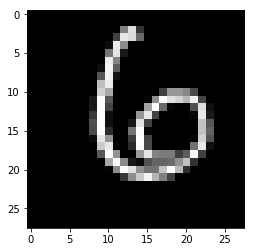

In [26]:
r = random.randint(0, len(mnist_test) -1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28 * 28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

single_prediction = model(X_single_data)

print("Label : ", Y_single_data.data)
print("Prediction : ", torch.max(single_prediction.data, 1)[1])

plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')
plt.show()

In [27]:
torch.save(model.state_dict(), 'DNN.pkl')